## Project Visualization Dashboard

### Backgound 

This notebook/dashboard contains all the graphical analysis detailed in the [Linear Regression](logistical_regression.ipynb), [Random Forest](random_forest.ipynb) and [XGBoost](xgboost.ipynb) model notebooks and the  [Data Prep](data_prep.ipynb) notebook.  

### Objective 
The objective is to provide an overall presentation of the project from data preperation, model compiling, results gathering and final conculions. Dashoard is comprised of the following tab:

1 Objective

2 Data Analysis

3 Model Analysis

4 Model Conclusions

In [5]:
# Import Section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_datareader.data as web
import csv
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, fbeta_score
from pathlib import Path
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [7]:
# Import hvplot.pandas after pn.extension
# This avoids plotly initialization failure
import hvplot.pandas

## Dashboard Functions

In [8]:
# Create a funtions for data visulizations

def create_pie(counts, label, color, title):
    
        '''Returns dount pie chart.
        
           Parameters:
                count (list): binary value count numbers.
                label (list): label for each of the binary count numbers
                color (list): color for each of the binary count numbers
                title (list): chart title           
        '''
        fig, ax = plt.subplots()
        count_slices = [counts[0], counts[1]]
        labels = [label[0], label[1]]
        explode = (0.2, 0)
        colors = [color[0],color[1]]
        plt.pie(count_slices, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
        circle=plt.Circle( (0,0), 0.4, color='white')
        p=plt.gcf()
        p.gca().add_artist(circle)
        plt.title(title[0])
        plt.text(0., 0., 'Thera Bank', horizontalalignment='center', verticalalignment='center')
        plt.close()
        return ax.figure

def gen_corr(df):

    '''Returns corredation plot for dashboard.

       Parameters:
            df (dataframe): dataframe to run plot on.     
    '''
    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(df.corr(),annot=True)
    return ax.figure

def gen_conf_heatmap(title, color, cm):

    '''Returns heatmap plot of the Confusion Matrix .

       Parameters:
            title (str): plot title.
            color (str): color of the plot
            cm  (obj): Confusion Matrix Object
    '''
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm,
            cmap = color, 
            fmt = '', 
            annot = True)

    # Set plot labels 
    plt.title(title)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    
    return ax.figure

def gen_roc_curve(model,X, y, title, plot_name):

    '''Creates image file for ROC plots.

       Parameters:
            model (obj): Model Object ROC curve to be generated on.
            X (list): X dataset
            y (list): y dataset
            title (str): plot title
            plot_name (str): name of file image
    '''    
    
    plt.clf()
    roc_curve = plot_roc_curve(model, X, y)

    # Set plot labels
    plt.title(title)
    plt.savefig('images/'+plot_name+'.png')


def append_model_scores(df, ac, bac, fbeta, roc):

    '''Returns a dataframe of model scores.

       Parameters:
            df (dataframe): dataframe containing scores for new score to be appended.
            ac (foat): accuracy score value
            bac (float): balanced accuracy value
            fbeta (float): F1 Beta Score
            roc (float): ROC-AUC Score
    '''    
    
    df = df.append({'Accuracy Score':ac, 
                              'Balance Accuracy Score': bac, 
                              'F-Beta score':fbeta, 
                              'ROC-AUC Score': roc}, ignore_index=True)
    return df

def gen_class_report_pnl(y_test, y_pred):
    
    '''Retuns a panel object containing the Classification Report converted to a Dataframe.

       Parameters:
            y_test (list): model y test values.
            y_pred (list): model 

    '''    
    #Convert classification report into a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    #Convert the classification dict to a datafram
    report_df = pd.DataFrame(report_dict).transpose()
    
    # Add dataframe to a panel for the dashboard
    report_pnl = pn.panel(report_df)
    
    return report_pnl


## CSV Data Pulls 

Import dataset generated from Data Prep notebook

In [9]:
# Setup input and output files and locations
filepath = "resources/"
file_csv = Path(filepath + "Bank_Personal_Loan_Modelling.csv")

# To import the X_train_smote, X_train_ros, X_train_scaled, X_test_scaled
X_train_smote = np.loadtxt('resources/X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt('resources/X_train_ros.csv', delimiter=',')
X_train_scaled = np.loadtxt('resources/X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt('resources/X_test_scaled.csv', delimiter=',')

# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv('resources/y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv('resources/y_train_ros.csv', sep=',', header=0, squeeze=True)

# To import y_train, y_test
y_train = pd.read_csv('resources/y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv('resources/y_test.csv', sep=',', header=0, squeeze=True, index_col=0)

# Read the data into a dataframe
loan_df = pd.read_csv(file_csv)


## Model Import 

Import each models generated from the Logistic Regression, Random Forest and XGBoost notebooks


In [10]:
# Load model Logistic Regression Scale
model_log_scale = load('models/log_scaled_model.joblib')

# Load model Logistic Regression SMOTE
model_log_smote = load('models/log_smote_model.joblib')

# Load model Logistic Regression ROS
model_log_ros = load('models/log_ros_model.joblib')

# Load model Random Forest Scale
model_rf_scale = load('models/rf_scaled_model.joblib')

# Load model Random Forest SMOTE
model_rf_smote = load('models/rf_smote_model.joblib')

# Load model Random Forest SMOTE
model_rf_ros = load('models/rf_ros_model.joblib')

# Load model XGBoost Scale
model_xgb_scale = load('models/xgb_scaled_model.joblib')

# Load model XGBoost SMOTE
model_xgb_smote = load('models/xgb_smote_model.joblib')

# Load model XGBoost ROS
model_xgb_ros = load('models/xgb_ros_model.joblib')

### Model Anaysis

For each model, the predicted results are generated where following scores and anlysis are created for display in the dashboard.

1) Accuracy Score   
2) Balanced Accuracy Score   
3) MSE   
4) RMSE   
5) ROC Curves   
6) Classification Reports   

In [11]:
# Set up model scenario labels and header dataframes

model_scenario = ['Logistic Regression: Scaled Data',
                 'Logistic Regression: SMOTE Data',
                 'Logistic Regression: ROS Data',
                 'Random Forest: Scaled Data',
                 'Random Forest: SMOTE Data',
                 'Random Forest: ROS Data',
                 'XGBoost: Scaled Data',
                 'XGBoost: SMOTE Data',
                 'XGBoost: ROS Data']

# Generate scores and reports column labels
col_score_names = ['Accuracy Score','Balance Accuracy Score', 'F-Beta score','ROC-AUC Score']

#### Logistic Regressison: Scaled

<Figure size 432x288 with 0 Axes>

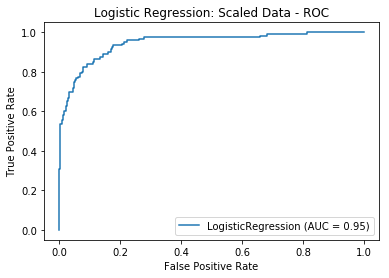

In [12]:
# Generate model prediction
y_pred_log_scale =model_log_scale.predict(X_test_scaled)

scores_df = pd.DataFrame(columns=col_score_names)
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_log_scale),
                   balanced_accuracy_score(y_test, y_pred_log_scale),
                   fbeta_score(y_test, y_pred_log_scale,beta=0.5),
                   roc_auc_score(y_test, y_pred_log_scale))

# Generate ROC Curve image
gen_roc_curve(model_log_scale,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[0] + " - ROC",
                  "log_scale_roc_curve")

#### Logistic Regressison: SMOTE

<Figure size 432x288 with 0 Axes>

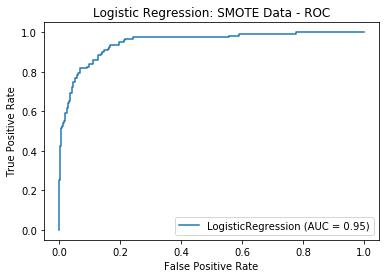

In [13]:
y_pred_log_smote =model_log_smote.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_log_smote),
                   balanced_accuracy_score(y_test, y_pred_log_smote),
                   fbeta_score(y_test, y_pred_log_smote,beta=0.5),
                   roc_auc_score(y_test, y_pred_log_smote))

# Generate ROC Curve image
gen_roc_curve(model_log_smote,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[1] + " - ROC",
                  "log_smote_roc_curve")

#### Logistic Regressison: ROS

<Figure size 432x288 with 0 Axes>

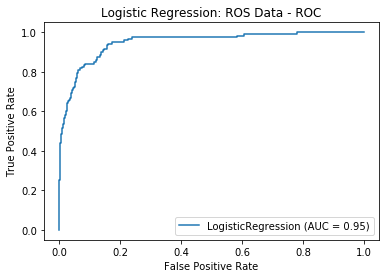

In [14]:
y_pred_log_ros =model_log_ros.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_log_ros),
                   balanced_accuracy_score(y_test, y_pred_log_ros),
                   fbeta_score(y_test, y_pred_log_ros,beta=0.5),
                   roc_auc_score(y_test, y_pred_log_ros))

# Generate ROC Curve image
gen_roc_curve(model_log_ros,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[2] + " - ROC",
                  "log_ros_roc_curve")

#### Random Forest: Scaled

<Figure size 432x288 with 0 Axes>

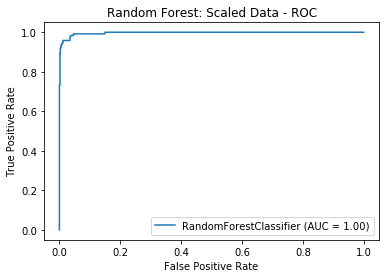

In [15]:
y_pred_rf_scale =model_rf_scale.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_rf_scale),
                   balanced_accuracy_score(y_test, y_pred_rf_scale),
                   fbeta_score(y_test, y_pred_rf_scale,beta=0.5),
                   roc_auc_score(y_test, y_pred_rf_scale))

# Generate ROC Curve image
gen_roc_curve(model_rf_scale,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[3] + " - ROC",
                  "rf_scale_roc_curve")

#### Random Forest: SMOTE

<Figure size 432x288 with 0 Axes>

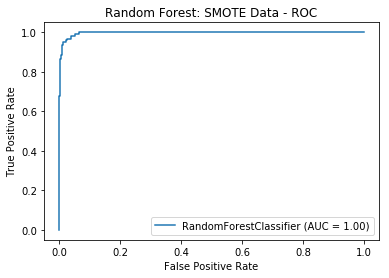

In [16]:
y_pred_rf_smote =model_rf_smote.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_rf_smote),
                   balanced_accuracy_score(y_test, y_pred_rf_smote),
                   fbeta_score(y_test, y_pred_rf_smote,beta=0.5),
                   roc_auc_score(y_test, y_pred_rf_smote))

# Generate ROC Curve image
gen_roc_curve(model_rf_smote,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[4] + " - ROC",
                  "rf_smote_roc_curve")

#### Random Forest: ROS

<Figure size 432x288 with 0 Axes>

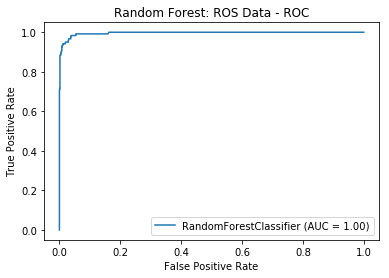

In [17]:
y_pred_rf_ros =model_rf_ros.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_rf_ros),
                   balanced_accuracy_score(y_test, y_pred_rf_ros),
                   fbeta_score(y_test, y_pred_rf_ros,beta=0.5),
                   roc_auc_score(y_test, y_pred_rf_ros))

# Generate ROC Curve image
gen_roc_curve(model_rf_ros,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[5] + " - ROC",
                  "rf_ros_roc_curve")

#### XGBoost Scaled

<Figure size 432x288 with 0 Axes>

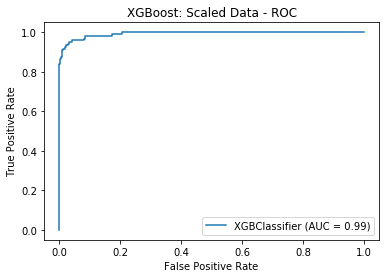

In [18]:
y_pred_xgb_scale =model_xgb_scale.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_xgb_scale),
                   balanced_accuracy_score(y_test, y_pred_xgb_scale),
                   fbeta_score(y_test, y_pred_xgb_scale,beta=0.5),
                   roc_auc_score(y_test, y_pred_xgb_scale))

# Generate ROC Curve image
gen_roc_curve(model_xgb_scale,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[6] + " - ROC",
                  "xgb_scale_roc_curve")

#### XGBoost SMOTE

<Figure size 432x288 with 0 Axes>

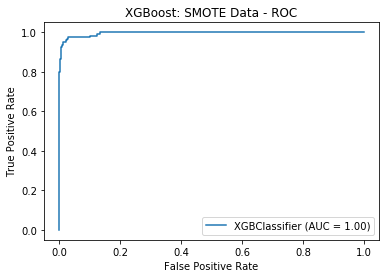

In [19]:
y_pred_xgb_smote =model_xgb_smote.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_xgb_smote),
                   balanced_accuracy_score(y_test, y_pred_xgb_smote),
                   fbeta_score(y_test, y_pred_xgb_smote,beta=0.5),
                   roc_auc_score(y_test, y_pred_xgb_smote))

# Generate ROC Curve image
gen_roc_curve(model_xgb_smote,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[7] + " - ROC",
                  "xgb_smote_roc_curve")

#### XGBoost ROS

<Figure size 432x288 with 0 Axes>

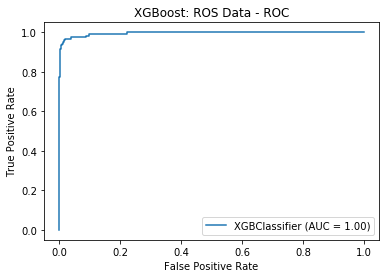

In [20]:
y_pred_xgb_ros =model_xgb_ros.predict(X_test_scaled)

# Generate scores and Reports
scores_df = append_model_scores(scores_df,
                   accuracy_score(y_test, y_pred_xgb_ros),
                   balanced_accuracy_score(y_test, y_pred_xgb_ros),
                   fbeta_score(y_test, y_pred_xgb_ros,beta=0.5),
                   roc_auc_score(y_test, y_pred_xgb_ros))

# Generate ROC Curve image
gen_roc_curve(model_xgb_ros,
                  X_test_scaled, 
                  y_test, 
                  model_scenario[8] + " - ROC",
                  "xgb_ros_roc_curve")

In [21]:
# Add row labels to the score_df

for x in range(len(scores_df)):
    scores_df.rename(index={x:model_scenario[x]}, inplace=True)

## Charts and Plots

Section creates a customer profile set of donunt pie charts based on the binary customer features.  Also 
created a Correlation heat map and data distrubion histograms for all the data features.

#### Pie Charts

In [22]:
# Analysis of Binary features
# Create dataframe of column names
binary_df = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

# Create dataframe for binary feature counts
counts = pd.DataFrame(binary_df)

# Create dataframe with column labels and counts
for col in binary_df:
    counts = pd.concat([counts,loan_df[col].value_counts()], axis=1, join='inner')

counts = counts.drop(columns = [0])

In [23]:
#Generate and display pie graph of binary features

# Label Dataframe prep for pie graphs
label = pd.DataFrame({'Personal Loan':['Did Not Purchased a Loan', 'Purchased Loan'],
                      'Securities Account': ['Does Own', 'Does Not Own'],
                      'CD Account': ['Does Own', 'Does Not Own'],
                      'Online' : ['Online', 'Offline'],
                      'CreditCard' : ['Does Own', 'Does Not Own'] })

# Color Dataframe prep for pie graphs
color = pd.DataFrame({'Personal Loan':['dodgerblue', 'lightskyblue'],
                      'Securities Account': ['darksalmon', 'lightsalmon'],
                      'CD Account': ['darkturquoise', 'turquoise'],
                      'Online' : ['violet', 'plum'],
                      'CreditCard' : ['tan', 'wheat'] })

# Title Dataframe prep for pie graphs
title = pd.DataFrame({'Personal Loan':['Purchased Loan During Last Campaign'],
                      'Securities Account': ['Owns a Securities Account'],
                      'CD Account': ['Own a CD Account'],
                      'Online' : ['Uses Online Banking'],
                      'CreditCard' : ['Owns a Thera Bank CC'] })

# Create dounut pie charts for each binary feature for display in dashboard
personal_loan_plot = create_pie(counts['Personal Loan'], label['Personal Loan'], color['Personal Loan'], title['Personal Loan'])
securities_account_plot = create_pie(counts['Securities Account'], label['Securities Account'], color['Securities Account'], title['Securities Account'])
cd_account_plot = create_pie(counts['CD Account'], label['CD Account'], color['CD Account'], title['CD Account'])
online_plot = create_pie(counts['Online'], label['Online'], color['Online'], title['Online'])
credit_card_plot = create_pie(counts['CreditCard'], label['CreditCard'], color['CreditCard'], title['CreditCard'])

#### Correlation Heatmap

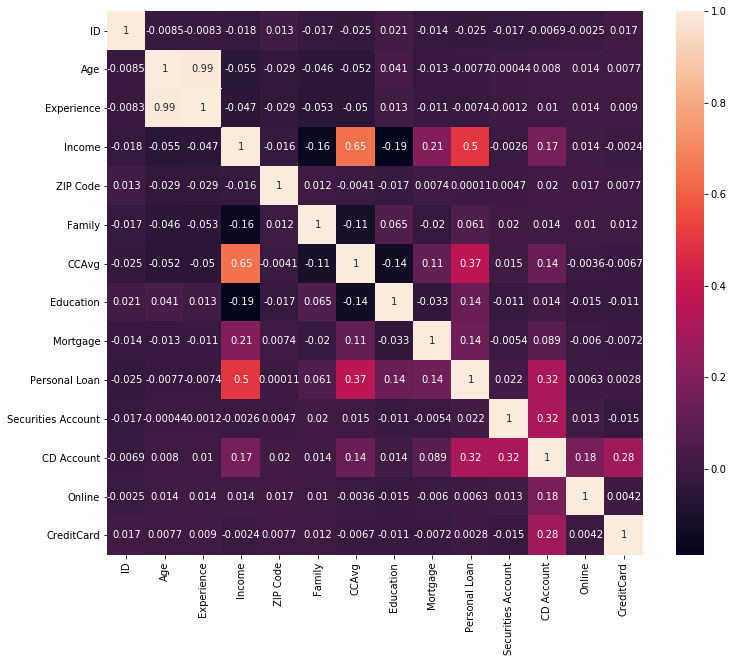

In [24]:
# Calculate the correlation between each column
# Use the `heatmap` function from the Seaborn library to visualize correlations
plt.figure(figsize=(12,10))
corr = sns.heatmap(loan_df.corr(),annot=True)

#### Data Dsitribution Histogram

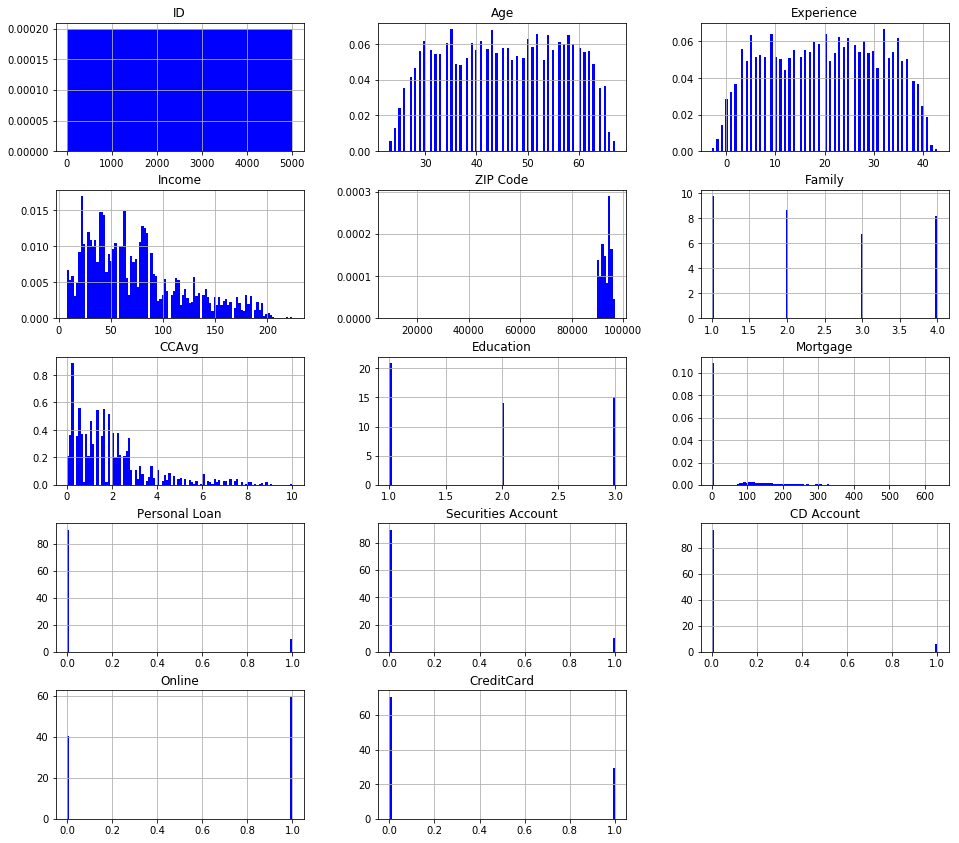

In [25]:
columns=loan_df.columns
loan_df[columns].hist(stacked=True,density=True, bins=100,color='blue', figsize=(16,30), layout=(10,3));
plt.savefig('images/dist.jpg')

In [26]:
# Features Summary
features_df = pd.DataFrame({model_scenario[5]:['Income', 'CCAvg', 'Education', 'Family', 'CD Account'],
                           model_scenario[4]:['Income', 'CCAvg', 'Education', 'Family', 'CD Account'],
                           model_scenario[8]:['Income', 'CCAvg', 'Family', 'Education', 'Age'],
                           model_scenario[7]:['CCAvg', 'Income', 'Age', 'Family', 'Education']})


## Dashboard Setup

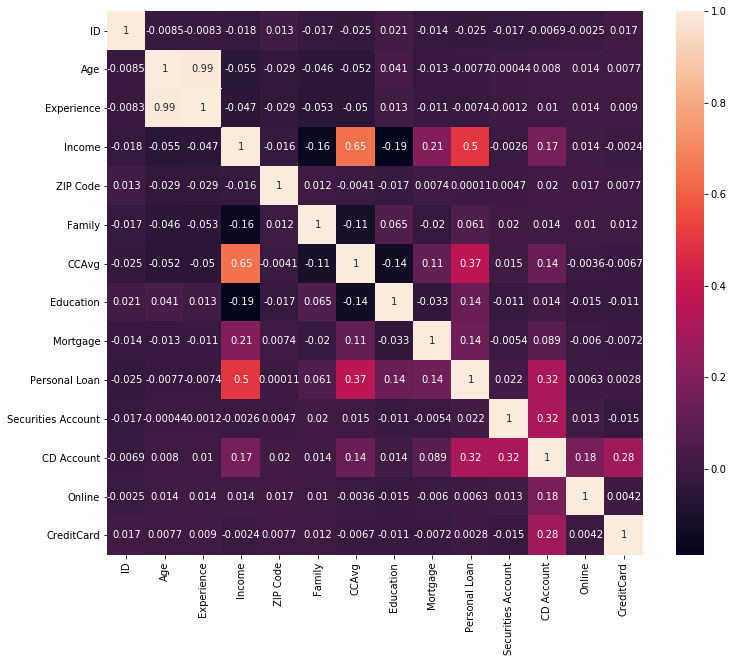

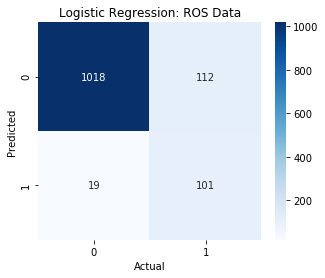

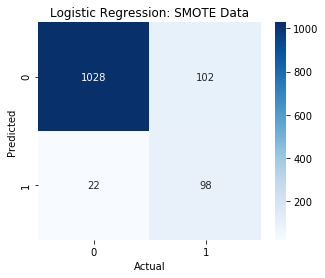

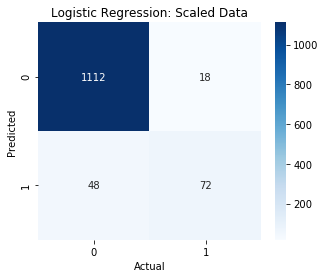

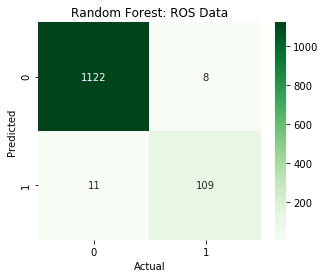

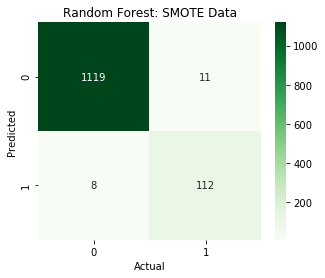

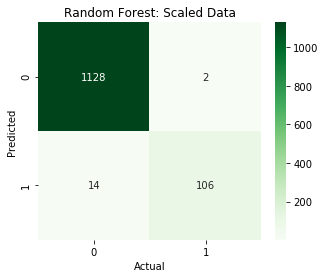

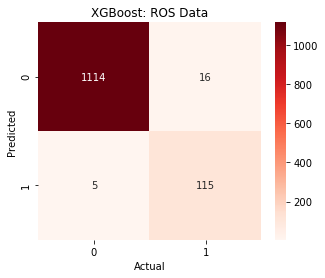

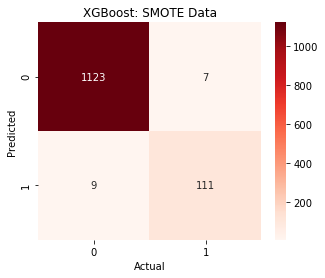

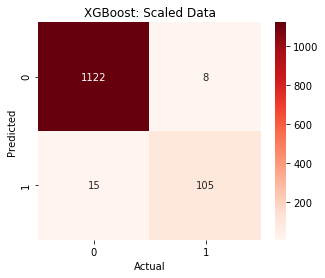

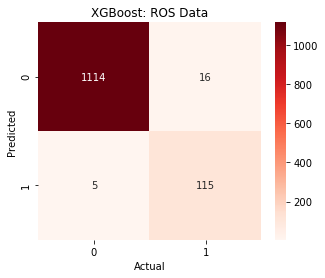

In [27]:
# Objective Tab Set Up

# Dash board title and image setup
dash_title = pn.panel("""<h1 style="text-align:center; font-size:20px;color:#8e4a1d;"><b>
                Thera Bank Predictive Model Analysis</b></h1>""")

objective_image = pn.panel('images/banner.jpg',height=220, width=950)

# Create customer profile section title
objective_customer =pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
     Customer Profiles</b></p>""")

# Create tab description
objective_desc =pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
    On the heels of a successful sales campaign that resulted in a 9 % increase  in loan business, 
    Thera Bank has employed the data analytic skills of Hair Flip Marketing and Consulting to explore ways 
    of converting its liability customers to personal loan customers.  The objective is to build a model that will help 
    Thera Bank identify potential customers who have a higher probability of purchasing a loan.</b></p>""",width=950)

# Create customer profile plot section
plot_row_a = pn.Row(personal_loan_plot, securities_account_plot)
plot_row_b = pn.Row(cd_account_plot, online_plot)
plot_col = pn.Column(plot_row_a,
                    plot_row_b,
                    credit_card_plot)

# Create tab layout
objective_tab = pn.Column(objective_image,
                        objective_desc,
                        objective_customer,
                        plot_col)

###===========================================================================================================================
# Data Analysis Tab

# Create tab description
data_desc =pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
     To assist with developing a predictive model, Thera Bank has provided a dataset consisting of 14 columns/features 
     and 5000 rows.  The target column/variable has been included with the dataset (Personal Loan) representing the 
     number of customers that purchased a loan during the last sales campaign.  After analyzing the data, the following 
     were observed.<br><br>
    There were no null or Na values found and no duplicate rows.  There were, however, negative values in the Experience 
    feature that will need to be addressed.  Distributions of the data varied between features and as a result, the data will 
    be scaled.  A Correlation analysis found a strong correlation between Age and Experience.  As a result of the negative 
    values and strong correlation, the Experience feature will be dropped.  Also removed are the Zip Code and ID as they have 
    no relevance. 
 </b></p>""",width=950)

# Create tab section titles
data_corr_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Correlation Analysis.</b></p>""")
data_dist_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Distribution Analysis.</b></p>""")

# Create tab images
data_image = pn.panel('images/data_analysis.jpg',height=220, width=950)
data_image_dist = pn.panel('images/dist.jpg')

# Add corr plot to panel
data_plot = pn.panel(corr)

# Create data analysis tab
data_tab = pn.Column(data_image,
                     data_desc,
                     data_corr_title,
                     gen_corr(loan_df),
                     data_dist_title,
                     data_image_dist) 

###===========================================================================================================================
# Model Analysis Tab Setup

model_image = pn.panel('images/model_analysis.jpg',height=220, width=950)

# Create tab section titles
model_score_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Model Scores</b></p>""")
model_cm_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Confusion Matrix</b></p>""")
model_report_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Classification Reports</b></p>""")
model_roc_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>ROC Curve</b></p>""")
model_feat_title = pn.panel("""<p style= font-size:20px;color:#3D6782;"><b>Features Importance</b></p>""")

# Create tab descriptions
model_desc_pnl1 = pn.panel("""<p style= font-size:16px;color:#3D6782;"><b>From the data analysis it was revealed that the target feature data was imbalanced.  To account for this imbalance, 
two oversampling algorithms, Naïve Random Over Sampling (ROS) and Synthetic Minority Oversampling Technique (SMOTE) will be applied.  
Three of the best equipped Machine Learning Models will be investigated to address the objective: Logistic Regression, Random Forest and XGBoost.  
The succeeding steps will be followed for each model during the analysis.</b></p>""",width=950)

model_desc_pnl2 = pn.panel("""<ol>
 <li><p style= font-size:16px;color:#3D6782;"><b>Data will be split into training and testing at 70 – 30 ratios.</b></p></li>
 <li><p style= font-size:16px;color:#3D6782;"><b>Standard Scaling will be applied to the X train and test sets.</b></p></li>
 <li><p style= font-size:16px;color:#3D6782;"><b>SMOTE and ROS will be applied creating two balanced data sets.</b></p></li>
 <li><p style= font-size:16px;color:#3D6782;"><b>For each model, the Scaled, SMOTE and ROS data will be applied and results 
 will be observed.</b></p></li>
</ol>""",width=950)

model_desc_pnl3 = pn.panel("""<p style= font-size:16px;color:#3D6782;"><b>Presented below for each model are Model Scores, 
Confusion Matrices, Classification Reports, ROC curves and Feature Importance.</b></p>""",width=950)

# Create confusion matrix plots section
model_cm_log= pn.Row(gen_conf_heatmap(model_scenario[2], 'Blues',confusion_matrix(y_test, y_pred_log_ros)),
                          gen_conf_heatmap(model_scenario[1], 'Blues',confusion_matrix(y_test, y_pred_log_smote)))

model_cm_log_row = pn.Row(gen_conf_heatmap(model_scenario[0], 'Blues',confusion_matrix(y_test, y_pred_log_scale)), 
                          model_cm_log)

model_cm_rf= pn.Row(gen_conf_heatmap(model_scenario[5], 'Greens',confusion_matrix(y_test, y_pred_rf_ros)),
                          gen_conf_heatmap(model_scenario[4], 'Greens',confusion_matrix(y_test, y_pred_rf_smote)))

model_cm_rf_row = pn.Row(gen_conf_heatmap(model_scenario[3], 'Greens',confusion_matrix(y_test, y_pred_rf_scale)), 
                          model_cm_rf)

model_cm_xgb= pn.Row(gen_conf_heatmap(model_scenario[8], 'Reds',confusion_matrix(y_test, y_pred_xgb_ros)),
                          gen_conf_heatmap(model_scenario[7], 'Reds',confusion_matrix(y_test, y_pred_xgb_smote)))

model_cm_xgb_row = pn.Row(gen_conf_heatmap(model_scenario[6], 'Reds',confusion_matrix(y_test, y_pred_xgb_scale)), 
                          model_cm_xgb)

# Create ROC curve plots section
model_roc_scale_img = pn.Row('images/log_ros_roc_curve.png', 'images/log_smote_roc_curve.png')
model_roc_scale_img_row = pn.Row('images/log_scale_roc_curve.png', model_roc_scale_img)

model_roc_ros_img = pn.Row('images/rf_ros_roc_curve.png', 'images/rf_smote_roc_curve.png')
model_roc_ros_img_row = pn.Row('images/rf_scale_roc_curve.png', model_roc_ros_img)

model_roc_smote_img = pn.Row('images/xgb_ros_roc_curve.png', 'images/xgb_smote_roc_curve.png')
model_roc_smote_img_row = pn.Row('images/xgb_scale_roc_curve.png', model_roc_smote_img)


# Create Features Importance plots section
model_feat_rf_scale_col = pn.Column(model_scenario[3], pn.panel('images/rf_feat_scale.png',height=300, width=450))
model_feat_rf_ros_col = pn.Column(model_scenario[4], pn.panel('images/rf_feat_ros.png',height=300, width=450))
model_feat_rf_smote_col = pn.Column(model_scenario[5], pn.panel('images/rf_feat_smote.png',height=300, width=450))

model_feat_rf = pn.Row( model_feat_rf_smote_col, model_feat_rf_ros_col)
model_feat_rf_row = pn.Row(model_feat_rf_scale_col, model_feat_rf)

model_xgb_feat_map = pn.panel("""<p style= font-size:12px;color:#3D6782;"><b><i>F0 = Age &nbsp;&nbsp; F1 = Income
 &nbsp;&nbsp;F2 = Family &nbsp;&nbsp; F3 = CCAvg &nbsp;&nbsp; F4 = Education &nbsp;&nbsp; F5 = Mortgage &nbsp;&nbsp;
 F6 = Securities Account &nbsp;&nbsp; F7 = CD Account &nbsp;&nbsp; F8 = Online &nbsp;&nbsp; F9 = CreditCard</i></b></p>""")

model_feat_xgb_scale_col = pn.Column(model_scenario[6], pn.panel('images/xgb_feat_scale.png',height=300, width=450))
model_feat_xgb_ros_col = pn.Column(model_scenario[7], pn.panel('images/xgb_feat_ros.png',height=300, width=450))
model_feat_xgb_smote_col = pn.Column(model_scenario[8], pn.panel('images/xgb_feat_smote.png',height=300, width=450))

model_feat_xgb = pn.Row(model_feat_xgb_smote_col, model_feat_xgb_ros_col)
model_feat_xgb_row = pn.Row(model_feat_xgb_scale_col,model_feat_xgb)

# Tab Layouts - Description Section
model_tab = pn.Column(model_image)
model_tab.append(model_desc_pnl1)
model_tab.append(model_desc_pnl2)
model_tab.append(model_desc_pnl3)

# Model scores section
model_tab.append(model_score_title)
model_tab.append(pn.panel(scores_df,width=950))

# Model Confusion Matrix section
model_tab.append(model_cm_title)
model_tab.append(model_cm_log_row)
model_tab.append(model_cm_rf_row)
model_tab.append(model_cm_xgb_row)

# Model Classification Report section
model_tab.append(model_report_title)
model_tab.append(model_scenario[0])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_log_scale),width=950))
model_tab.append(model_scenario[1])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_log_ros),width=950))
model_tab.append(model_scenario[2])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_log_smote),width=950))
model_tab.append(model_scenario[3])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_rf_scale),width=950))
model_tab.append(model_scenario[4])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_rf_ros),width=950))
model_tab.append(model_scenario[5])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_rf_smote),width=950))
model_tab.append(model_scenario[6])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_xgb_scale),width=950))
model_tab.append(model_scenario[7])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_xgb_ros),width=950))
model_tab.append(model_scenario[8])
model_tab.append(pn.panel(gen_class_report_pnl(y_test, y_pred_xgb_smote),width=950))

# Model ROC Curve section
model_tab.append(model_roc_title)
model_tab.append(model_roc_scale_img_row)
model_tab.append(model_roc_ros_img_row)
model_tab.append(model_roc_smote_img_row)

# Model Features Importance section
model_tab.append(model_feat_title)
model_tab.append(model_feat_rf_row)
model_tab.append(model_feat_xgb_row)
model_tab.append(model_xgb_feat_map)

###===========================================================================================================================
# Model Conclusion Tab Setup

conclusion_image = pn.panel('images/model_conclusion.jpg',height=220, width=950)

# Create section titles
conclusion_model_title = pn.panel("""<p style= font-size:20px;color:#0d51b8;"><i><b>XGBoost: Random Over Sample Data</i></b></p>""",width=950)
conclusion_feat_title = pn.panel("""<p style= font-size:20px;color:#0d51b8;"><b><i>Feature Importance</i></b></p>""",width=950)

# Create tab descriptions
conclusion_desc = pn.panel("""<p style= font-size:16px;color:#3D6782;"><b>From the analysis it has been determined 
that the best model to using when addressing the project objective is the XGBoost model using the Random Oversampling dataset.
Models using the scaled dataset were excluded as this dataset was imbalanced and results may be overfitted.
</b></p>""",width=950)

conclusion_results = pn.panel("""<p style= font-size:16px;color:#3D6782;"><b>Selecting XGBoost was based in the problem 
being resolved.  The goal of Thera Bank is to grow their consumer base with a model that will predict account holders 
as customers that will purchase a personal loan. The measure of success for this kind of model is one with the lowest number 
of predictions where the model predicted the customer purchased a loan when in reality they did not.  Recall score best 
identifies the samples that were classified correctly, minimizing the potential for false negative. Therefore, model recall 
and model F-Beta scores are the key evaluation metrics analyzed in determining which trained and tested dataset predictions 
are best to use. XGBoost scored the best in Recall and F-Beta.
</b></p>""",width=950)

conclusion_feat = pn.panel("""<p style= font-size:16px;color:#3D6782;"><b>Logistic regression models do not have a 
Features Importance function, thus XGBoost and Random Forest models were analyzed.  Both the Random Forest models that used 
the ROS and SMOTE data plus the XGBoost model using the ROS data identified Income first and CCAvg second as the top features.  
Other features include Education, Family, CD Account and Age which should be the focus of the next champaign.</b></p>""",width=950)



conclusion_score_col = pn.Column(model_score_title, scores_df.iloc[8])
conclusion_cm_col = pn.Column(model_cm_title, gen_conf_heatmap(model_scenario[8], 'Reds',confusion_matrix(y_test, y_pred_xgb_ros)))
conclusion_report_col = pn.Column(model_report_title, gen_class_report_pnl(y_test, y_pred_xgb_smote),width=950) 
conclusion_roc_col = pn.Column(model_roc_title, 'images/xgb_scale_roc_curve.png')

conclusion_reports_row = pn.Row(conclusion_score_col, conclusion_report_col)
conclusion_plots_row = pn.Row(conclusion_cm_col, conclusion_roc_col)

# Create model analysis average tab
conclusion_tab = pn.Column(conclusion_image, 
                           conclusion_desc,
                           conclusion_model_title,
                           conclusion_results,
                           conclusion_reports_row,
                           conclusion_plots_row,
                           conclusion_feat_title,
                           conclusion_feat,
                           features_df)

###===========================================================================================================================
# Dashboard Setup

# Create the main dashboard
tabs = pn.Tabs(("Objective",objective_tab),
               ("Data Analysis", data_tab),
               ("Model Analysis", model_tab),
               ("Model Conclusion", conclusion_tab))

dashboard = pn.Column(dash_title,tabs)

#### Serve the Panel Dashboard

In [28]:
dashboard.servable()
dashboard.show()

Launching server at http://localhost:56245
